# Q6 Canny Edge Detector

Use this notebook to run and test your edge detector. For each of the two
provided sample images, it should create and plot the following images
to disk, using the best parameters (per image) you were able to find:

1) The smoothed horizontal and vertical gradients (2 images).
2) The gradient magnitude image.
3) The gradient magnitude image after suppression.
4) The results of your full edge detection function.

The image naming convention isn't important- this notebook exists for you
to test and experiment with your code, and to figure out what the best
parameters are. As far as automated testing is concerned, only the
five functions in canny.py must adhere to a specific interface.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
##### YOUR CODE HERE #####
# Paths to images: example_images/mandrill.jpg, example_images/csbldg.jpg
img = cv2.imread('example_images/mandrill.jpg')
##### END YOUR CODE #####

### 1) The smoothed horizontal and vertical gradients (2 images).

Try different sigma values and see how the standard deviation of the gaussian blur kernel does change the output.

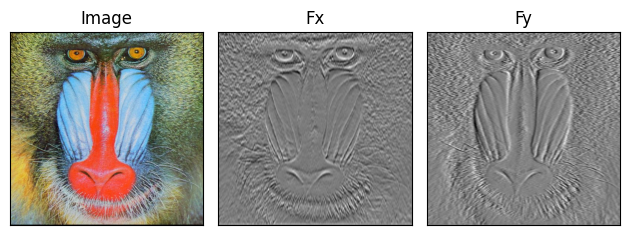

In [3]:
### EDIT SIGMA HERE ###
sigma = 3
#######################

from canny import filteredGradient

Fx, Fy = filteredGradient(img, sigma)

# Visualize img, Fx, and Fy 
##### YOUR CODE HERE #####
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(Fx, cmap='gray')
plt.title('Fx')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(Fy, cmap='gray')
plt.title('Fy')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
##### END YOUR CODE #####

### 2) The gradient magnitude image.

([], [])

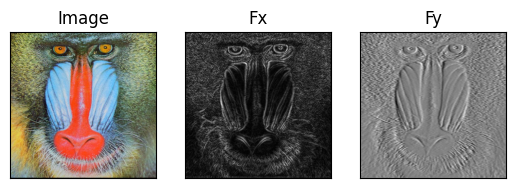

In [4]:
from canny import edgeStrengthAndOrientation

F, D = edgeStrengthAndOrientation(Fx, Fy)

# Visualize F
##### YOUR CODE HERE #####
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(F, cmap='gray')
plt.title('F')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(D, cmap='gray')
plt.title('D')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
##### END YOUR CODE #####

In [5]:
print(D.min(), D.max())

-0.07731018491778051 0.0745046653652144


### 3) The gradient magnitude image after suppression.

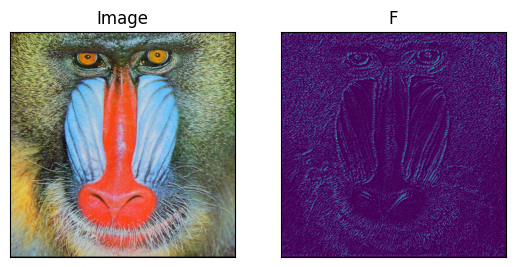

In [9]:
from canny import suppression

I = suppression(F,D)

# Visualize I
##### YOUR CODE HERE #####
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Image')
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(I)
plt.title('F')
plt.xticks([])
plt.yticks([])

plt.tight_layout()
##### END YOUR CODE #####

### 4) The results of your full edge detection function.

Combine *hysteresisThresholding* and all previous steps in *cannyEdgeDetection*

Try different thresholds and standard deviations for the blur kernel. Visualize the effects of each change. 

<!-- Experiment for the coin: Try to find a parameter set, such that only the outer edge of the coin becomes visible. -->

0.0 1.0
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


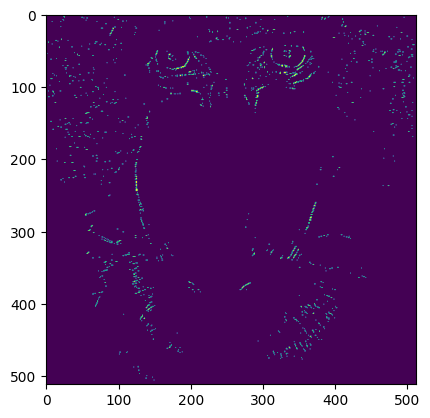

In [20]:
tL = .1
tH = .5
normalized = I / I.max()
print(normalized.min(), normalized.max())
D2 = np.round(D / np.pi * 4).astype(int)
orientations = np.arange(-1, 1)
I_1 = normalized > tH
print(I_1)
plt.imshow(I_1)
# x, y = np.indices(D2.shape)
# for i in orientations:
#     for j in orientations:
#         mask = (D2 == D2[x + i, y + j]) & (F < F[x + i, y + j])
#         I[mask] = 0

In [ ]:
### EDIT BLUR KERNEL AND THRESHOLDS HERE ###
sigma = 
tL = 
tH = 
#############################################


from canny import cannyEdgeDetection

edgeMapCanny = cannyEdgeDetection(img, sigma, tL, tH)
plt.figure(figsize=(10,10))
plt.imshow(edgeMapCanny, cmap='gray')
plt.title('Edge Mask')
plt.show()